In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

%matplotlib inline

In [6]:
def plot_history(history, figsize=(12, 4), loss_train_key='loss', loss_val_key='val_loss', metric_train_key='accuracy', metric_val_key='val_accuracy'):
    loss_train = history.get(loss_train_key, [])
    loss_valid = history.get(loss_val_key, [])
    metric_train = history.get(metric_train_key, [])
    metric_valid = history.get(metric_val_key, [])

    plt.figure(figsize=figsize)
    plt.subplot(1, 2, 1)
    plt.plot(loss_train, label='train')
    plt.plot(loss_valid, label='val')
    plt.ylim(0)
    plt.legend()

    if len(metric_train) > 0 or len(metric_valid) > 0:
        plt.subplot(1, 2, 2)
        plt.plot(metric_train, label='train')
        plt.plot(metric_valid, label='val')
        plt.ylim(top=1)
        plt.legend()

In [7]:
df = pd.read_csv("../data/interactions.csv")
df = df[['user_id', 'content_id', 'game', 'view']]
df.head()

,user_id,content_id,game,view
0,0,226,Alien Swarm,1
1,0,846,Cities Skylines,1
2,0,972,Counter-Strike,1
3,0,978,Counter-Strike Source,1
4,0,1125,Day of Defeat,1


In [8]:
df_game = pd.read_csv("../data/articles.csv")
df_game.head()

,content_id,game,total_users,total_hours
0,0,007 Legends,1,1.7
1,1,0RBITALIS,3,4.2
2,2,1... 2... 3... KICK IT! (Drop That Beat Like a...,7,27.0
3,3,10 Second Ninja,6,11.9
4,4,"10,000,000",1,4.6


In [9]:
users_items_matrix_df = df.pivot(
    index='user_id',
    columns='content_id',
    values='view'
).fillna(0)

users_items_matrix_df.head()

content_id,0,1,2,3,4,5,6,7,8,9,...,5103,5104,5105,5106,5107,5108,5109,5110,5111,5112
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
users_items_matrix_df.shape

(3757, 5113)

# Model

In [11]:
x = users_items_matrix_df.values

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-07-10 14:38:13.227711: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-10 14:38:13.227933: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 enc_1 (Dense)               (None, 512)               2618368   
                                                                 
 embeddings (Dense)          (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dec_1 (Dense)               (None, 512)               131584    
                                                                 
 user_score_pred (Dense)     (None, 5113)              2622969   
                                                                 
Total params: 5,504,249
Trainable params: 5,504,249
Non-trainable params: 0
_________________________________________________________________


/Users/arnaldo/Documents/autoencoders/.venv/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50


2023-07-10 14:38:13.746906: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-07-10 14:38:14.045256: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


53/53 [==============================] - 4s 36ms/step - loss: 0.0296 - val_loss: 0.0043
Epoch 2/50
 1/53 [..............................] - ETA: 1s - loss: 0.0267

2023-07-10 14:38:17.176282: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


53/53 [==============================] - 1s 24ms/step - loss: 0.0194 - val_loss: 0.0035
Epoch 3/50
53/53 [==============================] - 1s 21ms/step - loss: 0.0146 - val_loss: 0.0031
Epoch 4/50
53/53 [==============================] - 1s 21ms/step - loss: 0.0119 - val_loss: 0.0029
Epoch 5/50
53/53 [==============================] - 1s 21ms/step - loss: 0.0101 - val_loss: 0.0027
Epoch 6/50
53/53 [==============================] - 1s 22ms/step - loss: 0.0090 - val_loss: 0.0026
Epoch 7/50
53/53 [==============================] - 1s 22ms/step - loss: 0.0081 - val_loss: 0.0025
Epoch 8/50
53/53 [==============================] - 1s 21ms/step - loss: 0.0075 - val_loss: 0.0024
Epoch 9/50
53/53 [==============================] - 1s 21ms/step - loss: 0.0071 - val_loss: 0.0023
Epoch 10/50
53/53 [==============================] - 1s 20ms/step - loss: 0.0067 - val_loss: 0.0023
Epoch 11/50
53/53 [==============================] - 1s 24ms/step - loss: 0.0064 - val_loss: 0.0022
Epoch 12/50
53/53 [

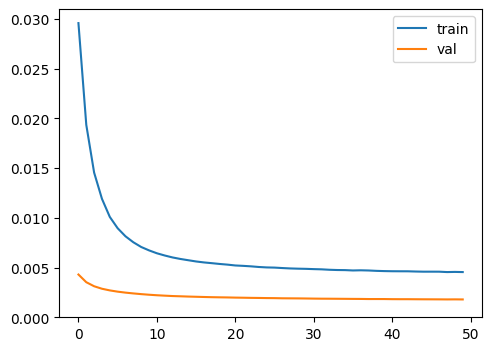

In [12]:
model = Sequential([
    Dense(units=512, activation='selu', name='enc_1', input_dim=users_items_matrix_df.shape[1]),
    Dense(units=256, activation='selu', name='embeddings'),
    Dropout(rate=0.8, name='dropout'),
    Dense(units=512, activation='selu', name='dec_1'),
    Dense(units=users_items_matrix_df.shape[1], activation='linear', name='user_score_pred')
])
model.summary()

model.compile(optimizer=Adam(lr=1e-4), loss='mse')

hist = model.fit(x, x, epochs=50, batch_size=64, shuffle=True, validation_split=0.1)
plot_history(hist.history)

In [13]:
new_matrix = model.predict(x) * (x == 0)

2023-07-10 14:39:15.714979: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


118/118 [==============================] - 1s 7ms/step


In [14]:
new_users_items_matrix_df = pd.DataFrame(
    new_matrix,
    columns=users_items_matrix_df.columns,
    index=users_items_matrix_df.index
)
new_users_items_matrix_df.head()

content_id,0,1,2,3,4,5,6,7,8,9,...,5103,5104,5105,5106,5107,5108,5109,5110,5111,5112
user_id,,,,,,,,,,,,,,,,,,,,,
0,-0.008346,0.007265,-0.000397,0.000339,-0.002805,0.002292,0.001324,0.010865,-0.008557,0.002531,...,0.008697,0.000690,0.005570,-0.005845,0.001141,-0.029449,0.003844,0.003178,-0.042792,-0.017983
1,0.008160,0.001041,-0.012503,0.007974,0.008595,0.007042,-0.008890,0.002820,-0.003756,0.005934,...,0.006237,0.001438,-0.008853,0.016184,0.007789,0.022541,-0.002886,0.006631,0.002849,-0.006866
2,0.003877,-0.006997,0.010674,-0.014485,-0.006275,0.013638,0.017871,0.002971,0.015952,0.016372,...,0.010558,-0.001570,-0.018700,0.023261,0.012230,0.078221,-0.002839,0.032586,-0.019659,-0.007476
3,0.000007,0.000835,-0.000754,-0.006418,0.003043,0.000556,0.002329,-0.000441,0.003141,-0.000569,...,-0.002764,0.007090,-0.004528,-0.010063,-0.003032,-0.006753,0.005094,0.012661,-0.002978,-0.003277
4,-0.003348,-0.000306,-0.004885,-0.002139,0.001230,-0.001537,0.001353,-0.002392,-0.001857,-0.001622,...,0.003648,0.006788,-0.004100,-0.000921,-0.002801,-0.008238,0.001039,0.007911,0.002469,-0.007511


In [15]:
def recommender_for_user(user_id, interact_matrix, df_content, topn = 10):
    pred_scores = interact_matrix.loc[user_id].values

    df_scores = pd.DataFrame({
        'content_id': list(users_items_matrix_df.columns),
        'score': pred_scores
    })

    df_rec = (df_scores
        .set_index('content_id')
        .join(df_content.set_index('content_id'))
        .sort_values('score', ascending=False)
        .head(topn)[['score', 'game']]
    )

    return df_rec[df_rec.score > 0]

In [16]:
# user_id = 1011, 1319
random_idx = np.random.choice(df.user_id.values, size=1)[0]
random_idx = 1011
recommender_for_user(user_id=random_idx, interact_matrix=users_items_matrix_df, df_content=df_game)

,score,game
content_id,,
3196,1.0,Portal
4221,1.0,Team Fortress 2
2055,1.0,Half-Life 2
2058,1.0,Half-Life 2 Episode Two
2059,1.0,Half-Life 2 Lost Coast
2057,1.0,Half-Life 2 Episode One


In [17]:
recommender_for_user(user_id=random_idx, interact_matrix=new_users_items_matrix_df, df_content=df_game)

,score,game
content_id,,
2056,0.360278,Half-Life 2 Deathmatch
978,0.240488,Counter-Strike Source
2062,0.218938,Half-Life Deathmatch Source
3197,0.198207,Portal 2
2064,0.144162,Half-Life Source
2457,0.133749,Left 4 Dead 2
1126,0.123611,Day of Defeat Source
2456,0.110040,Left 4 Dead
1879,0.098328,Garry's Mod


# Referências

- [Deep Learning para Sistemas de Recomendação (Parte 2) — Filtragem Colaborativa com AutoEncoders](https://medium.com/data-hackers/deep-learning-para-sistemas-de-recomendação-parte-2-filtragem-colaborativa-com-autoencoders-347ba7d53bae#:~:text=Um%20Autoencoder%20(AE)%20é%20uma,%2C%20f(x)%3Dh.)